In [1]:
from bs4 import BeautifulSoup
from scrape import extract
from scrape import extract_players
from scrape import extract_year
from scrape import make_dists
from scrape import extract_age
from scrape import run_knn
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import re
import matplotlib.pyplot as plt
from scrape import read_targets
from scrape import clean_name
from sklearn.svm import SVR
from sklearn.preprocessing import scale

In [2]:
df2022 = extract_players("2022", "wr", "PPR")

,Name,RECEIVING_REC,RECEIVING_TGT,RECEIVING_YDS,RECEIVING_Y/R,RECEIVING_LG,RECEIVING_20+,RECEIVING_TD,RUSHING_ATT,RUSHING_YDS,RUSHING_TD,MISC_FL,MISC_G,MISC_FPTS,MISC_FPTS/G,MISC_ROST,name
Rank,,,,,,,,,,,,,,,,,
1,Justin Jefferson (MIN),128,184,1809,14.1,64,49,8,4,24,1,0,17,368.6,21.7,100.0%,justin-jefferson
2,Tyreek Hill (MIA),119,170,1710,14.4,64,45,7,7,32,1,0,17,341.2,20.1,100.0%,tyreek-hill
3,Davante Adams (LV),100,180,1516,15.2,60,47,14,3,-1,0,0,17,335.5,19.7,99.9%,davante-adams
4,Stefon Diggs (BUF),110,156,1455,13.2,53,35,11,1,-3,0,0,17,321.2,18.9,99.9%,stefon-diggs
5,CeeDee Lamb (DAL),107,156,1359,12.7,39,30,9,10,47,0,0,17,301.6,17.7,99.9%,ceedee-lamb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Alex Erickson (FA),0,0,0,0.0,0,0,0,0,0,0,0,2,0.0,0.0,0.0%,alex-erickson
443,Jakeem Grant Sr. (CLE),0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.1%,jakeem-grant
444,Rashard Higgins (FA),0,0,0,0.0,0,0,0,0,0,0,0,1,0.0,0.0,0.0%,rashard-higgins


In [3]:
production2022 = df2022[['name', 'MISC_FPTS/G']]

In [4]:
names2022 = list(df2022["name"].head(100))
dists2022 = make_dists(names2022, "2022", "wr")
dists2022.head(20)

justin-jefferson
tyreek-hill
davante-adams
stefon-diggs
ceedee-lamb
aj-brown
amonra-stbrown
jaylen-waddle
devonta-smith
amari-cooper
jamarr-chase
christian-kirk
tyler-lockett
terry-mclaurin
brandon-aiyuk
dk-metcalf
mike-evans
tee-higgins
chris-godwin
michael-pittman
garrett-wilson
jerry-jeudy
cooper-kupp
dj-moore-wr
chris-olave
zay-jones
juju-smith-schuster
diontae-johnson
jakobi-meyers
adam-thielen
drake-london
mike-williams-wr
curtis-samuel
tyler-boyd
allen-lazard
gabriel-davis
josh-palmer
deebo-samuel
donovan-peoples-jones
george-pickens
christian-watson
keenan-allen
courtland-sutton
marquise-brown
kj-osborn
mack-hollins
deandre-hopkins
parris-campbell
brandin-cooks
richie-james
jahan-dotson
darius-slayton
russell-gage
marquez-valdesscantling
isaiah-mckenzie
marvin-jones
kalif-raymond
devin-duvernay
robert-woods
chris-moore
noah-brown
greg-dortch
deandre-carter
alec-pierce
olamide-zaccheaus
michael-gallup
chase-claypool
josh-reynolds
demarcus-robinson
devante-parker
romeo-doubs
darn

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,justin-jefferson,23,17,7.529412,3.362731,10.823529,3.868961,106.411765,62.947278,13.494118,4.642321,30.235294,16.108198,0.470588,0.605625,27.4,0
1,tyreek-hill,28,17,7.000000,3.124853,10.000000,3.597385,100.588235,54.284717,14.576471,4.781278,33.823529,16.525329,0.411765,0.599885,29.1,0
2,davante-adams,29,17,5.882353,2.887750,10.588235,3.326521,89.176471,53.909767,14.752941,8.884893,29.470588,16.708989,0.823529,0.856484,30.7,0
3,stefon-diggs,28,17,6.470588,2.972771,9.176471,4.105023,85.588235,37.897786,13.441176,2.389698,32.411765,12.499689,0.647059,0.762440,26.8,0
4,ceedee-lamb,23,17,6.294118,2.395209,9.176471,2.854002,79.941176,32.482521,12.941176,3.281689,25.176471,7.493019,0.529412,0.696009,28.1,1
5,aj-brown,25,17,5.176471,2.120913,8.529412,2.789005,88.000000,44.290485,16.382353,4.956189,36.470588,17.567074,0.647059,0.836039,27.2,1
6,amonra-stbrown,22,16,6.625000,2.471715,9.125000,2.955398,72.562500,32.595952,10.556250,3.034586,22.750000,10.108783,0.375000,0.695971,24.8,1
7,jaylen-waddle,23,17,4.411765,2.302398,6.882353,3.546039,79.764706,43.283646,18.235294,7.315249,34.470588,20.105948,0.470588,0.696009,20.0,1
8,devonta-smith,23,17,5.588235,2.450902,8.000000,2.930569,70.352941,43.784151,11.658824,6.085282,22.647059,12.295103,0.411765,0.599885,25.4,1
9,amari-cooper,28,17,4.588235,2.276706,7.764706,3.334832,68.235294,34.415334,15.841176,7.592416,27.235294,14.574472,0.529412,0.696009,24.4,1


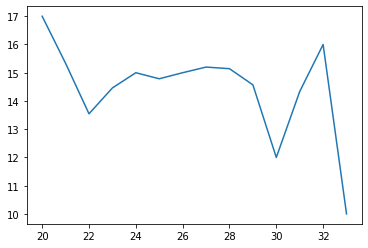

In [5]:
agepergames = dists2022[['age', 'games_played']]
df = agepergames.groupby('age')['games_played'].mean()
plt.plot(df)
plt.show()

In [6]:
dists2022[dists2022["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,justin-jefferson,23,17,7.529412,3.362731,10.823529,3.868961,106.411765,62.947278,13.494118,4.642321,30.235294,16.108198,0.470588,0.605625,27.4,0
1,tyreek-hill,28,17,7.000000,3.124853,10.000000,3.597385,100.588235,54.284717,14.576471,4.781278,33.823529,16.525329,0.411765,0.599885,29.1,0
2,davante-adams,29,17,5.882353,2.887750,10.588235,3.326521,89.176471,53.909767,14.752941,8.884893,29.470588,16.708989,0.823529,0.856484,30.7,0
3,stefon-diggs,28,17,6.470588,2.972771,9.176471,4.105023,85.588235,37.897786,13.441176,2.389698,32.411765,12.499689,0.647059,0.762440,26.8,0
10,jamarr-chase,22,13,6.692308,2.523265,10.307692,3.968813,80.461538,39.639948,11.246154,5.340213,24.615385,15.339935,0.692308,0.721602,22.0,0
22,cooper-kupp,29,9,8.333333,3.527668,10.888889,4.280302,90.222222,42.168387,10.455556,4.786349,30.111111,23.444708,0.666667,0.666667,18.5,0
41,keenan-allen,30,10,6.600000,2.973214,8.900000,4.085340,75.200000,27.545599,11.810000,3.838346,28.100000,10.765222,0.400000,0.663325,12.5,0
46,deandre-hopkins,30,9,7.111111,3.348115,10.666667,3.055050,79.666667,41.333333,10.911111,4.514777,21.444444,8.368076,0.333333,0.471405,14.5,0


In [7]:
dists2022[dists2022["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
4,ceedee-lamb,23,17,6.294118,2.395209,9.176471,2.854002,79.941176,32.482521,12.941176,3.281689,25.176471,7.493019,0.529412,0.696009,28.1,1
5,aj-brown,25,17,5.176471,2.120913,8.529412,2.789005,88.000000,44.290485,16.382353,4.956189,36.470588,17.567074,0.647059,0.836039,27.2,1
6,amonra-stbrown,22,16,6.625000,2.471715,9.125000,2.955398,72.562500,32.595952,10.556250,3.034586,22.750000,10.108783,0.375000,0.695971,24.8,1
7,jaylen-waddle,23,17,4.411765,2.302398,6.882353,3.546039,79.764706,43.283646,18.235294,7.315249,34.470588,20.105948,0.470588,0.696009,20.0,1
8,devonta-smith,23,17,5.588235,2.450902,8.000000,2.930569,70.352941,43.784151,11.658824,6.085282,22.647059,12.295103,0.411765,0.599885,25.4,1
9,amari-cooper,28,17,4.588235,2.276706,7.764706,3.334832,68.235294,34.415334,15.841176,7.592416,27.235294,14.574472,0.529412,0.696009,24.4,1
11,christian-kirk,25,17,4.941176,2.154901,7.823529,2.572142,65.176471,33.256994,13.358824,5.372047,26.058824,11.699525,0.470588,0.696009,22.3,1
12,tyler-lockett,29,16,5.250000,2.331845,7.312500,2.662676,64.562500,30.945454,12.506250,4.336541,25.187500,9.748197,0.562500,0.609175,20.4,1
13,terry-mclaurin,26,17,4.529412,1.818779,7.058824,2.208822,70.058824,29.242336,15.817647,5.057695,31.647059,13.195102,0.294118,0.455645,21.7,1
14,brandon-aiyuk,24,17,4.588235,2.088028,6.705882,2.823529,59.705882,23.067075,13.894118,4.797729,24.588235,9.437465,0.470588,0.696009,22.3,1


In [8]:
dists2022[dists2022['class'] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
18,chris-godwin,26,15,6.933333,1.948219,9.466667,2.729265,68.200000,24.169402,10.020000,2.703381,20.400000,9.024411,0.200000,0.400000,18.9,2
19,michael-pittman,24,16,6.187500,2.833257,8.812500,3.186274,57.812500,31.141248,9.300000,2.019592,18.750000,5.528336,0.250000,0.433013,23.3,2
25,zay-jones,27,16,5.125000,2.781074,7.562500,3.121873,51.437500,36.896763,9.687500,3.426893,18.312500,11.883385,0.312500,0.768013,20.3,2
26,juju-smith-schuster,25,16,4.875000,2.712817,6.312500,3.076499,58.312500,33.841023,12.406250,4.737281,22.625000,12.873786,0.187500,0.390312,15.5,2
27,diontae-johnson,26,17,5.058824,2.013793,8.647059,2.495671,51.882353,22.449636,10.711765,3.985692,19.000000,8.983645,0.000000,0.000000,25.7,2
28,jakobi-meyers,25,14,4.785714,2.241765,6.857143,3.020339,57.428571,23.714716,13.185714,4.826838,25.142857,9.303280,0.428571,0.494872,17.8,2
29,adam-thielen,31,17,4.117647,2.323343,6.294118,2.051247,42.117647,20.989864,10.888235,4.169622,17.647059,7.037222,0.352941,0.477885,15.9,2
30,drake-london,20,17,4.235294,2.073060,6.882353,2.948227,50.941176,32.896398,11.276471,4.361534,19.176471,9.995501,0.235294,0.424183,28.2,2
32,curtis-samuel,25,17,3.764706,2.389423,5.411765,3.088095,38.588235,24.840808,9.429412,5.661403,18.235294,12.506607,0.235294,0.424183,16.6,2
34,allen-lazard,26,15,4.000000,1.414214,6.666667,2.772885,52.533333,27.227111,12.600000,4.328510,23.933333,11.641688,0.400000,0.489898,17.8,2


In [9]:
dists2022[dists2022["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
33,tyler-boyd,27,17,3.470588,1.913348,4.882353,2.083051,45.647059,36.021140,12.435294,6.574813,22.294118,15.683505,0.352941,0.477885,13.4,3
35,gabriel-davis,23,15,3.200000,1.222020,6.200000,1.833030,55.733333,38.561581,17.426667,11.414463,27.133333,21.013858,0.466667,0.618241,16.2,3
39,george-pickens,21,17,3.058824,1.797730,4.941176,1.862023,47.117647,30.091786,14.347059,7.966187,23.352941,12.746124,0.235294,0.424183,14.7,3
40,christian-watson,23,14,2.928571,1.579525,4.642857,2.255379,43.642857,36.807622,13.342857,7.493684,23.000000,18.169834,0.500000,0.906327,11.7,3
48,brandin-cooks,28,13,4.384615,1.332347,7.153846,1.955118,53.769231,23.690809,12.538462,5.117622,26.923077,11.357556,0.230769,0.421325,16.1,3
50,jahan-dotson,22,12,2.916667,1.656217,5.083333,2.722080,43.583333,30.098334,13.375000,6.712194,24.416667,15.348498,0.583333,0.640095,11.0,3
51,darius-slayton,25,13,3.538462,1.692308,5.461538,2.240034,55.692308,29.488941,16.307692,6.671808,28.461538,15.269957,0.153846,0.360801,13.7,3
53,marquez-valdesscantling,27,17,2.470588,1.538435,4.764706,1.863880,40.411765,30.553827,14.923529,9.801232,21.470588,14.320358,0.117647,0.322190,12.4,3
63,alec-pierce,22,16,2.562500,1.999023,4.875000,2.204399,37.062500,29.657353,11.387500,8.297581,19.875000,15.671930,0.125000,0.330719,12.9,3
69,devante-parker,29,13,2.384615,1.862111,3.615385,2.675773,41.461538,44.027291,11.815385,8.889825,18.846154,15.271120,0.230769,0.575640,8.7,3


In [10]:
dists2022[dists2022["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
54,isaiah-mckenzie,27,16,2.625000,2.027159,4.125000,2.546444,26.437500,26.162876,7.831250,5.133069,12.437500,9.433774,0.250000,0.433013,11.3,4
55,marvin-jones,32,16,2.875000,1.996090,5.062500,2.536453,33.062500,24.903486,11.568750,7.843207,15.812500,10.162546,0.187500,0.390312,13.6,4
56,kalif-raymond,27,17,2.764706,1.554099,3.764706,2.210388,36.235294,23.989040,12.888235,12.368693,19.176471,14.943955,0.000000,0.000000,10.9,4
57,devin-duvernay,24,14,2.642857,1.673625,3.500000,1.880350,29.071429,17.870424,10.664286,5.986128,15.928571,8.795001,0.214286,0.557875,10.0,4
58,robert-woods,30,17,3.117647,1.604492,5.352941,2.194677,31.000000,21.581583,9.070588,4.296752,13.882353,9.423889,0.117647,0.322190,20.0,4
59,chris-moore,29,15,3.200000,2.135416,4.933333,2.293953,36.533333,30.010813,10.573333,5.951411,19.733333,14.261681,0.133333,0.339935,12.8,4
60,noah-brown,26,16,2.687500,1.927393,4.625000,2.595067,34.687500,30.324740,10.681250,6.352580,17.375000,14.704910,0.187500,0.526634,13.1,4
62,deandre-carter,29,17,2.705882,1.600173,3.823529,2.255328,31.647059,22.803357,10.511765,5.720231,17.823529,10.869468,0.176471,0.381220,9.1,4
64,olamide-zaccheaus,24,17,2.352941,1.411765,3.588235,2.143631,31.352941,23.318615,11.947059,7.391021,18.470588,12.975623,0.176471,0.381220,14.7,4
65,michael-gallup,26,14,2.785714,1.423204,5.285714,1.905952,30.285714,17.567944,9.942857,4.816447,15.000000,7.919235,0.285714,0.589015,13.3,4


2021 Data

In [11]:
df2021 = extract_players("2021", "wr", "PPR")

In [12]:
production2021 = df2021[['name', 'MISC_FPTS/G']]

In [13]:
names2021 = list(df2021["name"].head(100))
dists2021 = make_dists(names2021, "2021", "wr")
dists2021.head(20)

cooper-kupp
davante-adams
deebo-samuel
justin-jefferson
jamarr-chase
tyreek-hill
stefon-diggs
diontae-johnson
mike-evans
hunter-renfrow
keenan-allen
mike-williams-wr
jaylen-waddle
dk-metcalf
chris-godwin
tyler-lockett
michael-pittman
dj-moore-wr
ceedee-lamb
brandin-cooks
amonra-stbrown
marquise-brown
darnell-mooney
tee-higgins
terry-mclaurin
christian-kirk
amari-cooper
adam-thielen
jakobi-meyers
devonta-smith
tyler-boyd
aj-brown
kendrick-bourne
marvin-jones
brandon-aiyuk
van-jefferson
chase-claypool
russell-gage
cole-beasley
kj-osborn
aj-green
tim-patrick
marquez-callaway
courtland-sutton
cedrick-wilson
deandre-hopkins
allen-lazard
mecole-hardman
robby-anderson
elijah-moore
robert-woods
jarvis-landry
kalif-raymond
emmanuel-sanders
odell-beckham
laviska-shenault
byron-pringle
gabriel-davis
antonio-brown
braxton-berrios
quez-watkins
deonte-harty
donovan-peoples-jones
jamison-crowder
bryan-edwards
rondale-moore
nick-westbrook
zay-jones
corey-davis
devante-parker
rashod-bateman
nelson-agho

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,cooper-kupp,28,17,8.529412,2.003457,11.235294,2.183613,114.529412,23.889741,13.776471,2.704360,37.352941,12.029088,0.941176,0.802246,31.5,0
1,davante-adams,28,16,7.687500,2.337701,10.562500,3.656651,97.062500,41.589465,12.600000,3.834710,32.125000,12.164883,0.687500,0.768013,28.5,0
2,deebo-samuel,25,16,4.812500,2.554867,7.562500,3.445445,87.812500,54.051155,17.937500,4.641373,40.437500,21.805873,0.375000,0.599479,23.5,0
3,justin-jefferson,22,17,6.352941,2.299391,9.823529,2.955260,95.058824,41.551486,15.076471,4.245902,31.411765,12.141610,0.588235,0.599885,27.6,0
4,jamarr-chase,21,17,4.764706,2.413916,7.529412,2.892539,85.588235,66.642204,16.394118,6.923402,35.941176,22.377695,0.764706,0.876451,23.1,0
5,tyreek-hill,27,17,6.529412,3.533331,9.352941,4.405093,72.882353,55.164868,10.258824,4.328708,23.529412,17.174254,0.529412,0.848365,23.6,0
6,stefon-diggs,27,17,6.058824,2.013793,9.647059,2.764080,72.058824,31.132488,12.723529,6.440545,25.823529,14.825397,0.588235,0.599885,25.2,0
7,diontae-johnson,25,16,6.687500,1.927393,10.562500,3.463538,72.562500,25.034898,12.062500,6.967503,28.437500,12.985419,0.500000,0.612372,25.5,0
8,mike-evans,27,16,4.625000,2.117634,7.125000,3.018174,64.687500,31.150278,14.650000,5.817323,27.437500,10.816473,0.875000,0.927025,15.6,0
9,hunter-renfrow,25,17,6.058824,2.460765,7.529412,2.592243,61.058824,31.206090,10.117647,3.255987,21.000000,9.941002,0.529412,0.605625,20.4,0


In [14]:
dists2021prod = pd.merge(dists2021, production2022, how = 'inner', on = ['name'])

In [15]:
dists2021[dists2021["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,cooper-kupp,28,17,8.529412,2.003457,11.235294,2.183613,114.529412,23.889741,13.776471,2.704360,37.352941,12.029088,0.941176,0.802246,31.5,0
1,davante-adams,28,16,7.687500,2.337701,10.562500,3.656651,97.062500,41.589465,12.600000,3.834710,32.125000,12.164883,0.687500,0.768013,28.5,0
2,deebo-samuel,25,16,4.812500,2.554867,7.562500,3.445445,87.812500,54.051155,17.937500,4.641373,40.437500,21.805873,0.375000,0.599479,23.5,0
3,justin-jefferson,22,17,6.352941,2.299391,9.823529,2.955260,95.058824,41.551486,15.076471,4.245902,31.411765,12.141610,0.588235,0.599885,27.6,0
4,jamarr-chase,21,17,4.764706,2.413916,7.529412,2.892539,85.588235,66.642204,16.394118,6.923402,35.941176,22.377695,0.764706,0.876451,23.1,0
5,tyreek-hill,27,17,6.529412,3.533331,9.352941,4.405093,72.882353,55.164868,10.258824,4.328708,23.529412,17.174254,0.529412,0.848365,23.6,0
6,stefon-diggs,27,17,6.058824,2.013793,9.647059,2.764080,72.058824,31.132488,12.723529,6.440545,25.823529,14.825397,0.588235,0.599885,25.2,0
7,diontae-johnson,25,16,6.687500,1.927393,10.562500,3.463538,72.562500,25.034898,12.062500,6.967503,28.437500,12.985419,0.500000,0.612372,25.5,0
8,mike-evans,27,16,4.625000,2.117634,7.125000,3.018174,64.687500,31.150278,14.650000,5.817323,27.437500,10.816473,0.875000,0.927025,15.6,0
9,hunter-renfrow,25,17,6.058824,2.460765,7.529412,2.592243,61.058824,31.206090,10.117647,3.255987,21.000000,9.941002,0.529412,0.605625,20.4,0


In [16]:
dists2021[dists2021["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
14,chris-godwin,25,14,7.000000,2.927700,9.071429,3.918168,78.785714,34.912500,11.492857,3.520646,23.928571,8.931999,0.357143,0.479157,17.5,1
20,amonra-stbrown,21,16,5.625000,2.642797,7.437500,3.334830,57.000000,34.161382,9.575000,3.893023,19.875000,10.117281,0.312500,0.463512,20.1,1
26,amari-cooper,27,15,4.533333,2.848781,6.933333,3.872410,57.666667,35.653269,13.106667,5.415591,22.800000,9.927739,0.533333,0.618241,15.9,1
27,adam-thielen,30,13,5.153846,2.851347,7.307692,3.022597,55.846154,32.870015,10.523077,5.005405,21.076923,9.482466,0.769231,0.696568,15.7,1
28,jakobi-meyers,24,16,5.187500,1.911111,7.875000,2.781074,54.125000,22.056391,10.625000,3.433748,21.500000,8.223442,0.125000,0.330719,23.6,1
31,aj-brown,24,13,4.846154,3.206871,8.076923,3.452124,66.846154,47.437159,13.007692,4.839654,24.230769,14.895295,0.384615,0.486504,19.6,1
37,russell-gage,25,13,5.076923,3.074999,7.230769,3.261756,59.230769,38.411044,10.100000,5.324400,19.384615,12.833481,0.307692,0.461538,16.4,1
38,cole-beasley,32,16,5.125000,3.179524,7.000000,4.015595,43.312500,31.079975,8.393750,2.235640,13.812500,6.247187,0.062500,0.242061,17.1,1
43,courtland-sutton,25,17,3.411765,2.474786,5.764706,3.473080,45.647059,41.735781,12.535294,4.409341,22.352941,13.732491,0.117647,0.322190,18.1,1
49,elijah-moore,21,11,3.909091,2.502891,7.000000,2.730301,48.909091,40.412542,9.900000,5.906853,21.727273,16.393407,0.454545,0.655555,12.8,1


In [17]:
dists2021[dists2021["class"] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
30,tyler-boyd,26,16,4.187500,2.006824,5.875000,2.394656,51.750000,31.926674,12.050000,5.499773,24.250000,16.364978,0.312500,0.463512,16.9,2
32,kendrick-bourne,25,17,3.235294,1.591500,4.117647,1.843346,47.058824,27.984177,16.041176,15.681539,26.529412,18.247055,0.294118,0.570315,13.1,2
34,brandon-aiyuk,23,17,3.294118,2.051247,4.941176,2.600240,48.588235,33.196490,14.435294,8.711246,22.058824,11.409339,0.294118,0.455645,16.3,2
35,van-jefferson,24,17,2.941176,1.474113,5.235294,1.986111,47.176471,27.246663,17.011765,9.394422,31.411765,20.976342,0.352941,0.477885,14.7,2
36,chase-claypool,23,15,3.933333,2.205045,7.000000,3.011091,57.333333,33.820441,14.113333,8.023621,27.600000,16.316862,0.133333,0.339935,15.8,2
39,kj-osborn,24,17,2.941176,1.893350,4.823529,2.455134,38.529412,29.146925,12.664706,6.989483,22.470588,17.122801,0.411765,0.492153,13.6,2
42,marquez-callaway,23,17,2.705882,1.636521,4.941176,2.363213,41.058824,31.198549,14.617647,8.247298,22.000000,14.708941,0.352941,0.588235,16.7,2
44,cedrick-wilson,25,14,3.214286,1.697838,4.357143,2.467131,43.000000,32.765400,14.035714,8.567264,24.714286,17.981850,0.428571,0.622700,9.4,2
47,mecole-hardman,23,17,3.470588,2.172492,4.882353,3.046355,40.764706,25.126806,13.864706,11.129555,22.411765,15.266491,0.117647,0.322190,12.3,2
52,kalif-raymond,26,16,3.000000,1.936492,4.437500,2.499219,36.000000,32.895668,9.618750,7.154476,17.937500,17.907641,0.250000,0.559017,12.0,2


In [18]:
dists2021[dists2021["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
33,marvin-jones,31,17,4.294118,2.079726,7.058824,2.622764,48.941176,25.755572,12.152941,5.373477,20.235294,7.974440,0.235294,0.424183,19.9,3
40,aj-green,32,16,3.375000,1.763342,5.750000,2.410913,53.000000,31.430479,15.962500,6.953495,27.125000,11.602128,0.187500,0.390312,15.6,3
41,tim-patrick,27,16,3.312500,1.529655,5.312500,1.827524,45.875000,29.698222,13.000000,4.569874,20.437500,9.816878,0.312500,0.463512,15.7,3
45,deandre-hopkins,29,10,4.200000,1.661325,6.400000,3.322650,57.200000,19.275892,15.130000,6.923157,25.500000,13.230646,0.800000,0.748331,10.8,3
46,allen-lazard,25,14,2.857143,1.767045,4.285714,1.868100,36.642857,24.303460,14.035714,9.328268,20.571429,10.668473,0.571429,0.622700,10.1,3
51,jarvis-landry,28,12,4.333333,1.312335,7.250000,2.680951,47.500000,28.306360,10.341667,4.020874,19.166667,9.026196,0.166667,0.372678,16.7,3
53,emmanuel-sanders,34,14,3.000000,1.463850,5.142857,2.099563,44.714286,27.319351,14.064286,6.502044,21.357143,10.820662,0.285714,0.699854,11.0,3
54,odell-beckham,28,14,3.142857,1.684261,5.857143,2.531435,38.357143,26.895584,11.235714,3.279069,21.285714,12.549494,0.357143,0.479157,13.5,3
56,byron-pringle,27,16,2.625000,1.576190,3.750000,2.046338,35.500000,22.455512,14.912500,9.061586,20.062500,10.145619,0.312500,0.582961,8.9,3
68,corey-davis,26,9,3.777778,1.133115,6.555556,1.770820,54.666667,34.820173,13.366667,6.915843,22.222222,13.934591,0.444444,0.684935,9.8,3


In [19]:
dists2021[dists2021["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
48,robby-anderson,28,17,3.117647,2.054618,6.470588,3.431989,30.529412,22.497366,11.058824,12.223895,15.176471,12.509927,0.294118,0.455645,18.4,4
55,laviska-shenault,22,16,3.937500,1.638168,6.250000,2.250000,38.687500,23.842501,11.400000,12.613633,18.375000,14.747351,0.000000,0.000000,16.4,4
59,braxton-berrios,25,16,2.875000,2.446298,4.062500,3.799157,26.937500,23.572942,8.725000,7.214092,12.562500,11.973767,0.125000,0.330719,10.8,4
63,jamison-crowder,28,12,4.250000,2.046338,5.916667,2.498611,37.250000,21.840807,8.841667,3.378476,15.833333,6.631155,0.166667,0.372678,11.8,4
65,rondale-moore,21,14,3.857143,2.474358,4.571429,2.351725,31.071429,30.457146,7.428571,4.777092,17.500000,18.395458,0.071429,0.257539,11.0,4
66,nick-westbrook,24,15,2.533333,1.707500,3.800000,2.372060,31.733333,27.747592,10.973333,4.785042,17.200000,11.232097,0.266667,0.442217,10.7,4
70,rashod-bateman,21,12,3.833333,2.114763,5.666667,2.527625,42.916667,30.554482,10.058333,6.227287,17.083333,10.766138,0.083333,0.276385,11.0,4
71,nelson-agholor,28,15,2.466667,1.499630,4.266667,2.048306,31.533333,20.172148,12.540000,8.241586,17.866667,11.424340,0.200000,0.400000,12.0,4
72,jalen-guyton,24,16,1.937500,1.477699,3.000000,1.936492,28.000000,27.004629,12.562500,7.942439,16.875000,14.815005,0.187500,0.390312,7.1,4
73,zach-pascal,26,16,2.375000,1.615356,4.312500,2.337701,24.000000,18.691576,8.950000,5.866004,15.250000,11.567735,0.187500,0.526634,13.2,4


2020 Data

In [20]:
df2020 = extract_players("2020", "wr", "PPR")

In [21]:
names2020 = list(df2020["name"].head(100))
dists2020 = make_dists(names2020, "2020", "wr")
dists2020.head(20)

davante-adams
tyreek-hill
stefon-diggs
deandre-hopkins
calvin-ridley
justin-jefferson
dk-metcalf
tyler-lockett
allen-robinson
adam-thielen
mike-evans
aj-brown
robert-woods
keenan-allen
amari-cooper
juju-smith-schuster
brandin-cooks
marvin-jones
robby-anderson
terry-mclaurin
diontae-johnson
ceedee-lamb
chase-claypool
curtis-samuel
dj-moore-wr
cooper-kupp
cole-beasley
tee-higgins
tyler-boyd
corey-davis
chris-godwin
will-fuller
jarvis-landry
nelson-agholor
brandon-aiyuk
marquise-brown
russell-gage
michael-gallup
jamison-crowder
devante-parker
emmanuel-sanders
ty-hilton
sterling-shepard
tim-patrick
jerry-jeudy
laviska-shenault
keelan-cole
mike-williams-wr
dj-chark
darnell-mooney
christian-kirk
julio-jones
jakobi-meyers
darius-slayton
marquez-valdesscantling
gabriel-davis
zach-pascal
greg-ward
hunter-renfrow
kendrick-bourne
mecole-hardman
josh-reynolds
rashard-higgins
david-moore
antonio-brown
travis-fulgham
damiere-byrd
aj-green
anthony-miller
demarcus-robinson
danny-amendola
trequan-smith

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,davante-adams,27,14,8.214286,2.907590,10.642857,3.414405,98.142857,51.326486,11.571429,3.377960,29.071429,14.713766,1.285714,0.958315,1.9,0
1,tyreek-hill,26,15,5.800000,2.879815,9.000000,4.049691,85.066667,54.578954,15.366667,6.512825,31.133333,16.942517,1.000000,0.816497,21.3,0
2,stefon-diggs,26,16,7.937500,1.951562,10.375000,2.619041,95.937500,36.361843,12.100000,3.785168,27.937500,14.566523,0.500000,0.790569,3.4,0
3,deandre-hopkins,28,16,7.187500,2.920162,10.000000,2.958040,87.937500,45.545950,13.250000,7.523962,28.812500,14.612575,0.375000,0.484123,27.8,0
4,calvin-ridley,25,15,6.000000,2.422120,9.533333,2.777689,91.600000,42.877811,14.613333,6.296016,29.133333,15.534335,0.600000,0.711805,22.8,0
5,justin-jefferson,21,16,5.500000,2.524876,7.812500,3.468046,87.500000,47.838269,15.962500,6.127385,31.437500,16.062257,0.437500,0.704339,24.2,0
6,dk-metcalf,22,16,5.187500,2.627231,8.062500,2.860698,81.437500,44.438115,15.950000,6.098873,32.125000,15.446986,0.625000,0.695971,2.0,0
7,tyler-lockett,27,16,6.250000,3.455069,8.250000,4.160829,65.875000,41.007431,10.887500,3.055093,23.187500,10.887026,0.625000,1.053269,0.7,0
8,allen-robinson,26,16,6.375000,2.446298,9.437500,3.316036,78.125000,26.367297,13.000000,3.556332,26.625000,6.836254,0.375000,0.599479,1.1,1
9,adam-thielen,29,15,4.933333,2.489087,7.200000,2.970971,61.666667,34.576807,12.466667,3.748896,23.333333,11.886500,0.933333,0.771722,20.9,0


In [22]:
dists2020prod = pd.merge(dists2020, production2021, how = 'inner', on = ['name'])

In [23]:
dists2020[dists2020["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,davante-adams,27,14,8.214286,2.907590,10.642857,3.414405,98.142857,51.326486,11.571429,3.377960,29.071429,14.713766,1.285714,0.958315,1.9,0
1,tyreek-hill,26,15,5.800000,2.879815,9.000000,4.049691,85.066667,54.578954,15.366667,6.512825,31.133333,16.942517,1.000000,0.816497,21.3,0
2,stefon-diggs,26,16,7.937500,1.951562,10.375000,2.619041,95.937500,36.361843,12.100000,3.785168,27.937500,14.566523,0.500000,0.790569,3.4,0
3,deandre-hopkins,28,16,7.187500,2.920162,10.000000,2.958040,87.937500,45.545950,13.250000,7.523962,28.812500,14.612575,0.375000,0.484123,27.8,0
4,calvin-ridley,25,15,6.000000,2.422120,9.533333,2.777689,91.600000,42.877811,14.613333,6.296016,29.133333,15.534335,0.600000,0.711805,22.8,0
5,justin-jefferson,21,16,5.500000,2.524876,7.812500,3.468046,87.500000,47.838269,15.962500,6.127385,31.437500,16.062257,0.437500,0.704339,24.2,0
6,dk-metcalf,22,16,5.187500,2.627231,8.062500,2.860698,81.437500,44.438115,15.950000,6.098873,32.125000,15.446986,0.625000,0.695971,2.0,0
7,tyler-lockett,27,16,6.250000,3.455069,8.250000,4.160829,65.875000,41.007431,10.887500,3.055093,23.187500,10.887026,0.625000,1.053269,0.7,0
9,adam-thielen,29,15,4.933333,2.489087,7.200000,2.970971,61.666667,34.576807,12.466667,3.748896,23.333333,11.886500,0.933333,0.771722,20.9,0
10,mike-evans,26,16,4.375000,2.394656,6.812500,3.004554,62.875000,45.873297,13.043750,5.471970,23.375000,13.355125,0.812500,0.726184,2.1,0


In [24]:
dists2020[dists2020["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
8,allen-robinson,26,16,6.375000,2.446298,9.437500,3.316036,78.125000,26.367297,13.000000,3.556332,26.625000,6.836254,0.375000,0.599479,1.1,1
12,robert-woods,28,16,5.625000,2.446298,8.062500,2.703441,58.500000,31.821769,10.237500,3.691862,22.750000,11.765947,0.375000,0.484123,3.1,1
13,keenan-allen,28,14,7.142857,4.120630,10.500000,4.640659,70.857143,40.151245,10.807143,2.949204,19.642857,5.419636,0.571429,0.494872,23.4,1
14,amari-cooper,26,16,5.750000,2.839454,8.125000,3.461846,69.625000,37.090893,12.118750,5.946661,27.250000,18.201992,0.312500,0.463512,20.3,1
15,juju-smith-schuster,23,16,6.062500,2.105610,8.000000,3.000000,51.937500,27.466955,8.212500,3.269915,19.250000,7.512490,0.562500,0.609175,2.9,1
17,marvin-jones,30,16,4.750000,2.462214,7.187500,3.301870,61.125000,44.353516,12.012500,4.529331,20.812500,9.913493,0.562500,0.704339,19.8,1
18,robby-anderson,27,16,5.937500,2.105610,8.500000,2.549510,68.500000,30.475400,12.000000,4.948232,28.125000,15.078441,0.187500,0.390312,24.7,1
20,diontae-johnson,24,15,5.866667,3.303870,9.600000,4.800000,61.533333,36.509116,9.913333,7.609281,21.933333,15.264192,0.466667,0.618241,2.0,1
23,curtis-samuel,23,15,5.133333,1.892676,6.466667,2.552559,56.733333,31.875731,10.753333,4.670741,22.866667,9.520971,0.200000,0.400000,17.6,1
25,cooper-kupp,27,15,6.133333,2.604270,8.266667,3.837823,64.933333,33.717388,10.766667,4.049966,24.600000,13.405472,0.200000,0.400000,1.5,1


In [25]:
dists2020[dists2020["class"] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
19,terry-mclaurin,24,15,5.800000,2.166410,8.933333,2.322834,74.533333,33.816893,12.700000,3.920034,28.866667,15.615662,0.266667,0.442217,1.2,2
21,ceedee-lamb,21,16,4.625000,1.832860,6.937500,2.221169,58.437500,30.530658,12.387500,6.195449,27.000000,13.490738,0.312500,0.582961,17.4,2
22,chase-claypool,22,16,3.875000,1.932453,6.812500,3.468046,54.562500,28.870332,14.700000,7.439674,27.812500,18.828897,0.562500,0.863767,1.1,2
24,dj-moore-wr,23,15,4.400000,1.665333,7.866667,2.895207,79.533333,32.814360,18.786667,6.660517,36.266667,16.384817,0.266667,0.573488,21.5,2
27,tee-higgins,21,16,4.187500,1.943539,6.750000,2.772634,56.750000,35.315542,11.512500,5.691098,24.312500,16.319922,0.375000,0.599479,18.6,2
29,corey-davis,25,14,4.642857,2.818489,6.571429,3.133102,70.285714,49.831758,13.171429,7.805074,26.785714,19.749064,0.357143,0.479157,0.4,2
30,chris-godwin,24,12,5.416667,1.891134,7.000000,1.914854,70.000000,29.740545,13.250000,4.765588,28.166667,11.845065,0.583333,0.640095,3.0,2
32,nelson-agholor,27,16,3.000000,1.870829,5.125000,3.119996,56.000000,39.115214,19.668750,12.898581,31.000000,21.610183,0.500000,0.500000,14.9,2
34,marquise-brown,23,16,3.625000,1.727534,6.250000,1.984313,48.062500,32.164555,11.956250,7.051770,24.875000,18.408133,0.500000,0.612372,3.9,2
36,michael-gallup,24,16,3.687500,2.053008,6.562500,2.573149,52.687500,35.683888,13.750000,6.595548,24.062500,14.354741,0.312500,0.582961,16.4,2


In [26]:
dists2020[dists2020["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
31,jarvis-landry,27,15,4.800000,1.758787,6.733333,2.719477,56.000000,27.614006,11.900000,3.803507,19.466667,6.561165,0.200000,0.400000,3.6,3
44,laviska-shenault,21,14,4.142857,1.597191,5.642857,2.580342,42.857143,22.718328,9.771429,4.431612,19.928571,10.046067,0.357143,0.610286,12.8,3
45,keelan-cole,27,16,3.437500,1.869784,5.500000,2.645751,40.125000,31.701489,11.050000,3.960587,17.625000,9.923929,0.312500,0.463512,14.3,3
48,darnell-mooney,22,16,3.812500,2.127756,6.125000,3.038811,39.437500,20.493806,10.312500,2.859606,21.000000,13.200379,0.250000,0.433013,0.0,3
55,zach-pascal,25,16,2.750000,1.250000,4.437500,1.902917,39.312500,19.334938,15.200000,5.898093,21.875000,8.014635,0.312500,0.582961,0.9,3
56,greg-ward,25,16,3.312500,1.827524,4.937500,2.221169,26.187500,19.027016,7.718750,4.091946,13.312500,8.075571,0.375000,0.599479,13.2,3
57,hunter-renfrow,24,16,3.500000,1.732051,4.812500,2.554867,41.000000,19.400387,13.706250,9.343679,21.125000,12.524351,0.125000,0.330719,14.0,3
58,kendrick-bourne,24,15,3.266667,1.806162,4.933333,2.174601,44.466667,24.068975,13.400000,5.490355,19.600000,10.011993,0.133333,0.339935,13.0,3
59,mecole-hardman,22,16,2.562500,1.579903,3.875000,2.471715,35.000000,25.236382,13.193750,7.096607,20.875000,12.975337,0.250000,0.433013,9.8,3
60,josh-reynolds,25,16,3.250000,1.887459,5.062500,2.946794,38.625000,21.791268,12.900000,5.605466,18.687500,8.446292,0.125000,0.330719,0.7,3


In [27]:
dists2020[dists2020["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
54,gabriel-davis,21,16,2.187500,1.423848,3.875000,2.260393,37.437500,33.190678,14.762500,12.803607,20.312500,16.107912,0.437500,0.496078,1.3,4
62,david-moore,25,16,2.187500,1.073473,2.937500,1.344840,26.062500,27.875771,11.062500,11.990354,17.937500,18.915829,0.375000,0.484123,0.2,4
80,jalen-guyton,23,16,1.750000,1.145644,3.437500,1.801692,31.937500,28.185698,18.850000,18.808941,24.250000,22.919697,0.187500,0.390312,8.8,4
86,jalen-reagor,21,11,2.818182,1.336085,4.909091,2.274545,36.000000,15.189709,17.354545,14.378542,22.454545,13.812798,0.090909,0.287480,9.0,4
89,golden-tate,31,12,2.916667,1.497683,4.333333,2.211083,32.333333,11.360262,15.133333,11.525286,21.666667,10.265909,0.166667,0.372678,10.1,4
91,henry-ruggs,21,13,2.000000,1.109400,3.307692,1.065877,34.769231,34.512325,14.115385,15.256870,22.000000,21.533516,0.153846,0.360801,7.8,4
94,tyron-johnson,24,12,1.666667,1.649916,2.166667,2.074983,33.166667,25.235007,20.433333,20.588562,25.416667,21.842078,0.250000,0.433013,4.1,4
95,preston-williams,23,8,2.250000,1.089725,4.375000,1.494783,36.000000,30.919250,15.375000,7.959860,21.375000,13.350445,0.500000,0.500000,6.3,4
97,miles-boykin,23,16,1.187500,1.073473,2.062500,1.434780,16.625000,14.966108,11.800000,12.038220,13.187500,12.420843,0.250000,0.433013,1.2,4


In [28]:
# stack dists2020prod and dists2021prod
dists_prod = dists2021prod.append([dists2020prod], ignore_index=True)

In [29]:
mat = dists_prod.values
names = mat[:,0]
mean_fpts = mat[:,-1]
mat = np.delete(mat, 0, 1)  # delete name column of mat
mat = np.delete(mat, -1, 1)  # delete name column of mat
# Using sklearn
svr = SVR(kernel='rbf')
mat = scale(mat)
svr.fit(mat, mean_fpts)

SVR()

In [30]:
mat_test = dists2022.values
names2022 = mat_test[:,0]
mat_test = np.delete(mat_test, 0, 1)  # delete name column of mat
mat_test = scale(mat_test)
fpts_pred = svr.predict(mat_test)
results = pd.DataFrame([names2022,fpts_pred], index=["name", "proj fpts"]).T
classes = dists2022[['name', 'class']]
results = pd.merge(results, classes, how='inner', on=['name'])
results = results.sort_values('proj fpts', ascending=False)
results = results.reset_index(drop=True)
results.head(50)

,name,proj fpts,class
0,devonta-smith,14.909087,1
1,christian-kirk,14.826598,1
2,tee-higgins,14.802255,1
3,aj-brown,14.569534,1
4,ceedee-lamb,14.533359,1
5,stefon-diggs,14.419887,0
6,amonra-stbrown,14.175559,1
7,jerry-jeudy,14.137555,1
8,jamarr-chase,14.133572,0
9,mike-evans,14.020714,1
